In [1]:
import tensorflow as tf

In [2]:
# 남이 만들어 놓은 모델 가져오기 2가지 
# feature extraction / feature fineing 

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image  # 이미지를 불러오거나 
import time
import functools

image 불러오기 5개 

matplot, scipy, opencv, pil(쉽다), scikit

opencv 채널의 문제절 

pil은 넘파이 포맷으로 불러오지 않는다. 그래도 쉽게 np로 변환할 수 있음

tensorflow2에서는 tf.data로 넘파이로 안불러와도 편하게 불러올 수 있다. tf는 범용적인 애이다. neural network 편하게 해주는 것. 다양한 것을 할 수 있다. 

In [75]:
def tensor_to_image(tensor): 
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor) # 불러오는 것은 PIL

In [112]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
# utils, plot 모델에서 그림그리는것 / get_file('웹에서 가져온다.')
# https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1913_-_Composition_7.jpg
# style_path = 'C:\\Users\\Cho Gyung Ah\\Documents\\github\\image\\pic.jpg'
# https://1m3wnq4dk41o3xjsyg127meb-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/abstract-art-artistic-featured.jpg
style_path = tf.keras.utils.get_file('abstract-art-artistic-featured.jpg', 'https://1m3wnq4dk41o3xjsyg127meb-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/abstract-art-artistic-featured.jpg')

3244032/3241012 [==============================] - 2s 0us/step


In [113]:
# 이미지 불러온 방법은 많다. 
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
# 형변환 하는 것 
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape) # 비율 찾는 것이다. #
  img = img[tf.newaxis, :] # 차원은 한차원 더 올려야한다. 
  return img

# 옛날 방식 (2013)
# 컨텐츠 구조
# 스타일 구조 

In [114]:
# googlenet, customizing, vgg19 기반 다크넷 
# resnet(사람을 뛰어넘는 모델)

In [115]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)
    
# expand dims 

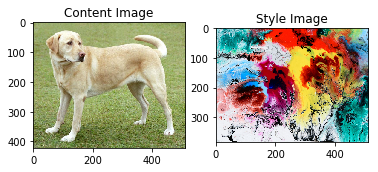

In [116]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [117]:
# keras 에서는 include_top 를 이용해서 교체할 수 있다. 

In [118]:
# tessorflow hub에서
# 케라스는 hug

# 덴스, 컨볼루 

# 남들이 만들어 놓은 구조만 알면 쓸 수 있다. 로스빼고 하면 알기가 어렵다. 

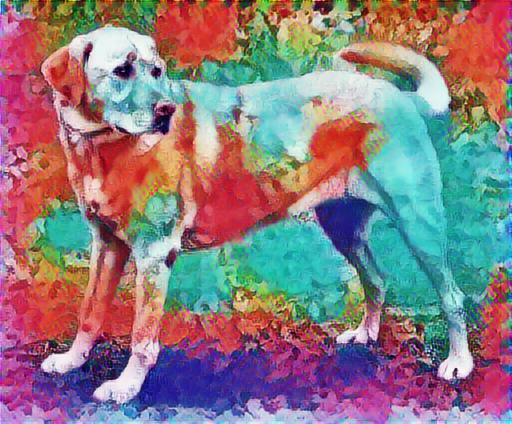

In [159]:
import tensorflow_hub as hub
# 텍스트가 뚜련한 애들만 잘 나온다. 
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

In [18]:
type(tensor_to_image)  # 함수/ 그외는 인스턴가 나온다. 

function

함수형 페러다음으로 다 만들어 놓는다. 

In [19]:
# Define content and style representations

In [58]:
# include_top: whether to include the fully-connected layer at the top of the network

In [119]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
# 1,2 번 줄 x 순서를 바꿔도 실행된다. 
# 어떤게 더 좋을까? 
# 전처리하고나서 크기 바꾸는게 더 좋지 않을까..? 확인해보길..
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([1, 1000])

In [120]:
# eagerly executing - 아직 완전히 호환이 안된다. EagerTensor' object has no attribute 'argsort'
# 아주 중요한 디버깅 기법이다. 
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]

In [121]:
predicted_top_5

[('n02099712', 'Labrador_retriever', 0.4931721),
 ('n02099601', 'golden_retriever', 0.23665206),
 ('n02104029', 'kuvasz', 0.03635738),
 ('n02099849', 'Chesapeake_Bay_retriever', 0.024182795),
 ('n02107574', 'Greater_Swiss_Mountain_dog', 0.018646054)]

In [122]:
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('Labrador_retriever', 0.4931721),
 ('golden_retriever', 0.23665206),
 ('kuvasz', 0.03635738),
 ('Chesapeake_Bay_retriever', 0.024182795),
 ('Greater_Swiss_Mountain_dog', 0.018646054)]

In [123]:
# numpy - shape & type 중요하다. 

In [124]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
# include_top 하면 dense가 없어진다. 
print()
for layer in vgg.layers: 
  print(layer.name)


input_16
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [125]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [143]:
# Content layer where will pull our feature maps
content_layers = ['block5_conv2'] 

# Style layer of interest
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [144]:
def vgg_layers(layer_names):
  """ Creates a vgg model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
#   1000종류의 class에 대해서 미리 학습을 해놨기 때문에 왠만큼 된다는 가정이 있다. 
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

In [145]:
# 스타일 (깊은 레이어 - 추상)
# 콘텐츠 (얕은 레이어)

In [146]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 384, 512, 64)
  min:  0.0
  max:  843.9336
  mean:  40.757168

block2_conv1
  shape:  (1, 192, 256, 128)
  min:  0.0
  max:  4951.2534
  mean:  217.86401

block3_conv1
  shape:  (1, 96, 128, 256)
  min:  0.0
  max:  10767.41
  mean:  218.71185

block4_conv1
  shape:  (1, 48, 64, 512)
  min:  0.0
  max:  23437.43
  mean:  850.3005

block5_conv1
  shape:  (1, 24, 32, 512)
  min:  0.0
  max:  3610.398
  mean:  58.11372



In [147]:
def gram_matrix(input_tensor):
#     einsum으로 복잡한 행렬 문제를 풀 수 있다. 짱좋음. 
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

In [148]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False
# composition 

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
#     comprehension 방식
    return {'content':content_dict, 'style':style_dict}

In [149]:
# GAN 표현하는 방법 5가지인데, 다 필요는 없고 3가지

In [150]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

style_results = results['style']

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())

# style 특징 뽑아낸 것 

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.0055228467
    max:  28014.568
    mean:  263.79025

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  61479.504
    mean:  9100.95

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  545623.44
    mean:  7660.9766

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  4320501.5
    mean:  134288.86

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  110005.38
    mean:  1487.0381

Contents:
   block5_conv2
    shape:  (1, 26, 32, 512)
    min:  0.0
    max:  2410.8796
    mean:  13.764152


In [151]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [152]:
image = tf.Variable(content_image)

In [153]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [154]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [155]:
style_weight=1e-2
content_weight=1e4

In [156]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers
# 연산할 수 있는 구조로 만들기 (최정 아웃풋을 낼것이다)
    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [157]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

W1029 21:17:59.242018 16912 ag_logging.py:146] Entity <bound method StyleContentModel.call of <__main__.StyleContentModel object at 0x0000020E90D55F98>> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Failed to parse source code of <bound method StyleContentModel.call of <__main__.StyleContentModel object at 0x0000020E90D55F98>>, which Python reported as:
  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dic

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
#     comprehension 방식
    return {'content':content_dict, 'style':style_dict}

This may be caused by multiline strings or comments not indented at the same level as the code.


W1029 21:18:00.555210 16912 ag_logging.py:146] Entity <bound method StyleContentModel.call of <__main__.StyleContentModel object at 0x0000020E90D55F98>> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Failed to parse source code of <bound method StyleContentModel.call of <__main__.StyleContentModel object at 0x0000020E90D55F98>>, which Python reported as:
  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dic

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
#     comprehension 방식
    return {'content':content_dict, 'style':style_dict}

This may be caused by multiline strings or comments not indented at the same level as the code.


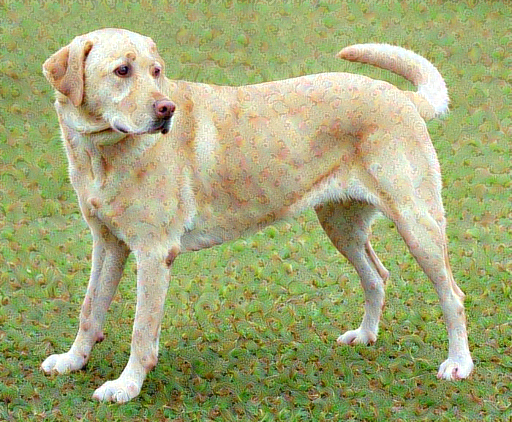

In [158]:
train_step(image) # 한번씩 한번씩 해본 것 
train_step(image)
train_step(image)
tensor_to_image(image) # 할때마다 누적되서 정지상태가온 사람이 있다.

W1029 21:16:05.932373 16912 ag_logging.py:146] Entity <bound method StyleContentModel.call of <__main__.StyleContentModel object at 0x0000020E9D04BB70>> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Failed to parse source code of <bound method StyleContentModel.call of <__main__.StyleContentModel object at 0x0000020E9D04BB70>>, which Python reported as:
  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dic

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
#     comprehension 방식
    return {'content':content_dict, 'style':style_dict}

This may be caused by multiline strings or comments not indented at the same level as the code.


W1029 21:16:07.924145 16912 ag_logging.py:146] Entity <bound method StyleContentModel.call of <__main__.StyleContentModel object at 0x0000020E9D04BB70>> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: Failed to parse source code of <bound method StyleContentModel.call of <__main__.StyleContentModel object at 0x0000020E9D04BB70>>, which Python reported as:
  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dic

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
#     comprehension 방식
    return {'content':content_dict, 'style':style_dict}

This may be caused by multiline strings or comments not indented at the same level as the code.


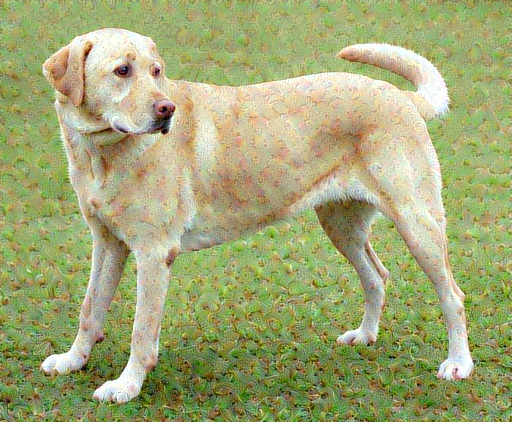

In [141]:
train_step(image) # 한번씩 한번씩 해본 것 
train_step(image)
train_step(image)
tensor_to_image(image) # 할때마다 누적되서 정지상태가온 사람이 있다.

In [32]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))
  
end = time.time()
print("Total time: {:.1f}".format(end-start))

.........

KeyboardInterrupt: 

In [ ]:
def high_pass_x_y(image):
  x_var = image[:,:,1:,:] - image[:,:,:-1,:]
  y_var = image[:,1:,:,:] - image[:,:-1,:,:]

  return x_var, y_var

In [ ]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2,2,2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2,2,3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2,2,4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

In [ ]:
plt.figure(figsize=(14,10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1,2,1)
imshow(clip_0_1(sobel[...,0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1,2,2)
imshow(clip_0_1(sobel[...,1]/4+0.5), "Vertical Sobel-edges")

In [ ]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [ ]:
total_variation_loss(image).numpy()

In [ ]:
tf.image.total_variation(image).numpy()

In [ ]:
total_variation_weight=30

In [ ]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

In [ ]:
image = tf.Variable(content_image)

In [ ]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))